# <br>Perform KNN and logistic regression for the dataset ServiceTest.csv

In [1]:
#importing the necessary packages
import os
os.chdir('C:/Users/sreepa/Downloads')
# Pandas - to work with dataframes
import pandas as pd
# Numpy - to work with numerical computations
import numpy as np
# seaborn - package for visualization
import seaborn as sns
# matplotlib - package for visualization
import matplotlib.pyplot as plt
#Sklearn - package to split data into train & test
from sklearn.model_selection import train_test_split
# Sklearn - package to use logistic regression
from sklearn.linear_model import LogisticRegression
# Sklearn - package to standardize data => z=(xi-mu)/sigma
from sklearn.preprocessing import StandardScaler
# Sklearn - package to find Accuracy Score and Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
# Sklearn - package to get the classification report(Precision,Recall,F1 score etc)
from sklearn.metrics import classification_report
#Sklearn - package for ploting the confusion matrix
from sklearn.metrics import plot_confusion_matrix
#Sklearn - package to split dataset into k folds
from sklearn.model_selection import KFold
#Sklearn - package to evaluate the score,prediction and validation by cross validation
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate

In [2]:
# =============================================================================
# IMPORTING DATA
# =============================================================================
service_data=pd.read_csv('ServiceTest.csv')

# Exploratory data analysis:

#1.Data information (types and missing value) and statistics
#2.Data preprocessing 
#3.Data visualization

In [3]:
#======to get the information of data======
service_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
OilQual        135 non-null float64
EnginePerf     135 non-null float64
NormMileage    135 non-null float64
TyreWear       135 non-null float64
HVACwear       135 non-null float64
Service        135 non-null object
dtypes: float64(5), object(1)
memory usage: 6.5+ KB


<font color=blue>#Observations:

Dataset consists of 135 rows and 6 columns. There is one categorical variable 'Service' and all the other five variables are of float datatype.There are no null values in any of the columns.</font>

In [4]:
#============to get the 5 point summary,average and count================
service_data.describe()

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,58.629380,59.077366,59.118254,60.863823,58.986136
std,38.858638,38.603943,37.461473,38.445306,40.000363
min,2.597185,1.891003,3.588986,6.143161,-1.719738
25%,26.695516,27.418265,31.259536,28.901162,31.311275
50%,61.023282,61.501061,59.350883,61.304031,62.620518
75%,104.228821,103.744032,103.051485,106.172658,105.331843
max,106.388821,105.744032,105.051485,108.172658,105.826843


<font color=blue>#Observations:Mean and median doesnt vary much for all columns. All the variables have almost equal mean and standard deviation.</font>
<br>1. OilQual has an average value of 58.62 with a standard deviation of 38.85.The range of values is [2.59 - 106.38].25% of the data lies below the value 26.69 and 50 % of the data lies below 61.02 and the 75% data lieas below 104.22 and rest 25% above 104.22.
<br><br>2. EnginePerf has an average value of 59.07 with a standard deviation of 38.60.The range of values is [1.89 - 105.74].25% of the data lies below the value 27.41 and 50 % of the data lies below 61.50 and the 75% data lieas below 103.74 and rest 25% above 103.74.
<br><br>3. NormMileage has an average value of 59.11 with a standard deviation of 37.46.The range of values is [3.58 - 105.05].25% of the data lies below the value 31.25 and 50 % of the data lies below 59.35 and the 75% data lieas below 103.05 and rest 25% above 103.05.
<br><br>4. TyreWear has an average value of 60.86 with a standard deviation of 38.44.The range of values is [6.14 - 108.17].25% of the data lies below the value 28.90 and 50 % of the data lies below 61.30 and the 75% data lieas below 106.17 and rest 25% above 106.17.
<br><br>5. HVACWear has an average value of 58.98 with a standard deviation of 40.00.The range of values is [-1.71 - 105.82].25% of the data lies below the value 31.31 and 50 % of the data lies below 62.62 and the 75% data lieas below 105.33 and rest 25% above 105.33.

In [5]:
service_data.head()

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
0,45.773338,49.936615,49.777581,48.263851,50.952072,No
1,4.987185,7.891003,6.588986,9.493161,3.240262,No
2,4.987185,4.891003,7.308986,8.373161,2.780262,No
3,106.388821,104.454032,103.051485,106.282658,105.536843,No
4,104.388821,103.744032,103.051485,106.132658,105.776843,No


In [6]:
#to find the null values or missing values
service_data.isnull().sum()

OilQual        0
EnginePerf     0
NormMileage    0
TyreWear       0
HVACwear       0
Service        0
dtype: int64

<font color= blue>#Observation
There are no null or missing values</font>

In [7]:
#to find the duplicate values
service_data.duplicated().sum()

0

<font color=blue>#There is no duplicated rows </font>

In [8]:
#to check whether the data is balanced
pd.crosstab(index=service_data['Service'],columns=service_data['Service'],normalize=True)

Service,No,Yes
Service,,
No,0.733333,0.000000
Yes,0.000000,0.266667


<font color=blue>ServiceTest dataset is an imbalanced dataset. 73 percent of cars has not done the Service and 26.6 percent cars has done the Service.
We may need to do OverSampling or UnderSampling to make the dataset balanced</font>

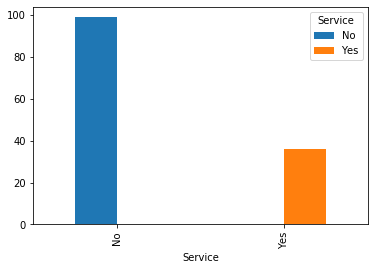

In [9]:
pd.crosstab(service_data['Service'], service_data.Service).plot(kind='bar')

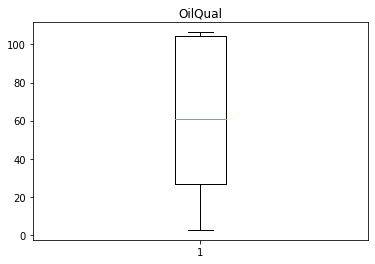

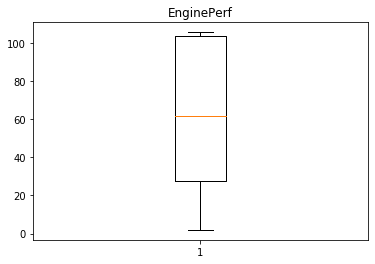

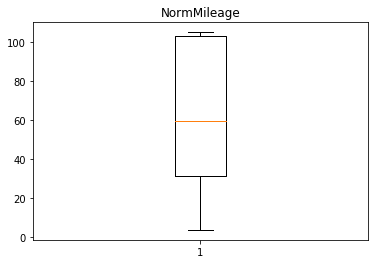

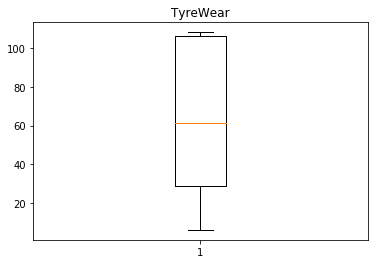

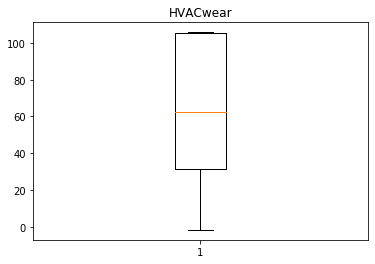

In [10]:
#Boxplot: to check whether there is any outlier
num_col=[n for n in service_data.columns if service_data[n].dtypes!='object']
for col in num_col:
    plt.boxplot(service_data[col])
    plt.title(col)
    plt.show()

<font color=blue># No outliers in this dataset </font>

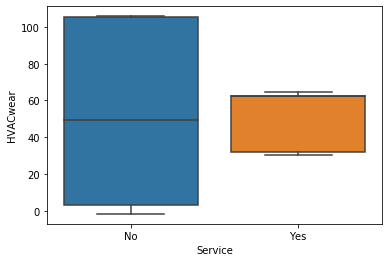

In [11]:
sns.boxplot(x='Service',y='HVACwear',data=service_data)

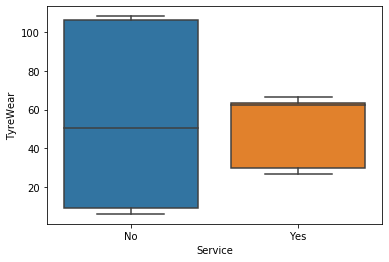

In [12]:
sns.boxplot(x='Service',y='TyreWear',data=service_data)

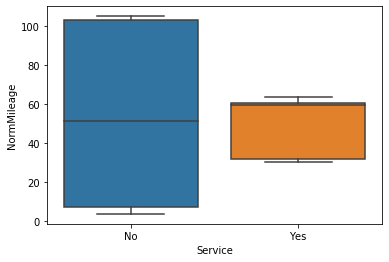

In [13]:
sns.boxplot(x='Service',y='NormMileage',data=service_data)

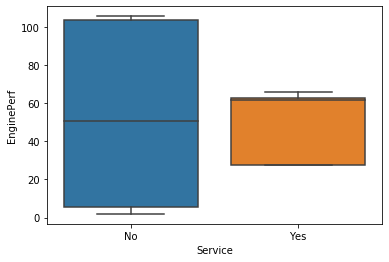

In [14]:
sns.boxplot(x='Service',y='EnginePerf',data=service_data)

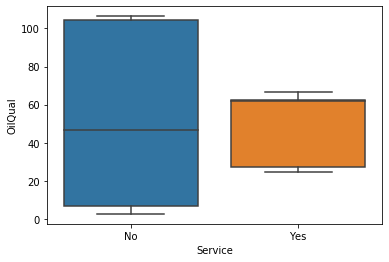

In [15]:
sns.boxplot(x='Service',y='OilQual',data=service_data)

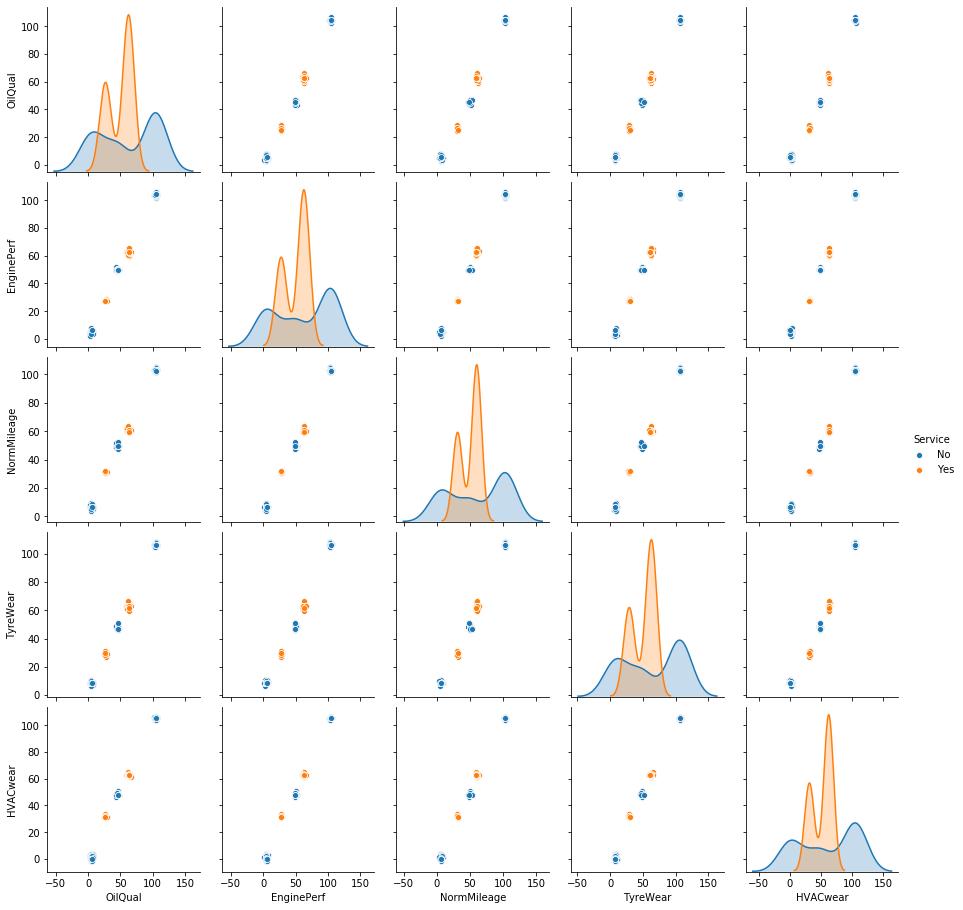

In [16]:
sns.pairplot(service_data,hue='Service') 


#<font color = green>Plot clearly says that the predictor variables are highly positively corelated. <br>
Cars which has done the Service has 'OilQual', 'EnginePerf', 'NormMileage', 'TyreWear', 'HVACwear' values between 20 to 40 and 50 to 70.<br> When the 'OilQual', 'EnginePerf', 'NormMileage', 'TyreWear', 'HVACwear' values are high or too low then the 'Service' is not done.</font>

In [17]:
#Label Encoding : Cars which has done Service as 0 and which has not done Service as 1
service_data['Service']=service_data['Service'].map({'Yes':0,'No':1})

In [18]:
service_data['Service']

0      1
1      1
2      1
3      1
4      1
      ..
130    1
131    1
132    0
133    1
134    1
Name: Service, Length: 135, dtype: int64

In [19]:
#to find the corelation
corr = service_data.corr()
print(corr)
print(round(corr,2))

              OilQual  EnginePerf  NormMileage  TyreWear  HVACwear   Service
OilQual      1.000000    0.998319     0.997806  0.999025  0.997562  0.139987
EnginePerf   0.998319    1.000000     0.998801  0.998289  0.998555  0.140411
NormMileage  0.997806    0.998801     1.000000  0.998180  0.998794  0.149342
TyreWear     0.999025    0.998289     0.998180  1.000000  0.997291  0.156695
HVACwear     0.997562    0.998555     0.998794  0.997291  1.000000  0.113908
Service      0.139987    0.140411     0.149342  0.156695  0.113908  1.000000
             OilQual  EnginePerf  NormMileage  TyreWear  HVACwear  Service
OilQual         1.00        1.00         1.00      1.00      1.00     0.14
EnginePerf      1.00        1.00         1.00      1.00      1.00     0.14
NormMileage     1.00        1.00         1.00      1.00      1.00     0.15
TyreWear        1.00        1.00         1.00      1.00      1.00     0.16
HVACwear        1.00        1.00         1.00      1.00      1.00     0.11
Service    

<font color =blue> #There is high positive corelation between all the predictor variables.
The dependent variable Service has weak corelation with all the other predictor variables.</font>

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features=list(set(service_data.columns)-set(['Service']))
X = service_data[features]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
 
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
 
print(vif_data) 


       feature          VIF
0  NormMileage  1952.837485
1     HVACwear  1245.953257
2      OilQual  1871.133491
3     TyreWear  2142.231267
4   EnginePerf  2175.801560


<font color=blue>#Variance Inflation Factor (VIF) is very high for all the features which means there is multicolinearity in the dataset.EnginePerf has the highest VIF.</font>

# Logistic Regression: without standardizing

In [21]:
#Seperating the features and target variable
features=list(set(service_data.columns)-set(['Service']))
y=service_data['Service'].values
print(features)
x=service_data[features].values

['NormMileage', 'HVACwear', 'OilQual', 'TyreWear', 'EnginePerf']


In [22]:
#Splitting train and test data : 70 % of the data in the training dataset and the rest 30 % in testing dataset
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [23]:
#Making the instance of the  model
logistic=LogisticRegression(max_iter=1000)

In [24]:
#Fitting the values for x and y
logistic.fit(train_x,train_y)

LogisticRegression(max_iter=1000)

In [25]:
logistic.coef_

array([[ 1.49812231, -1.88658456, -0.20433196,  0.49423336,  0.21274505]])

In [26]:
logistic.intercept_

array([-5.35284225])

In [27]:
#Prediction from test data
prediction=logistic.predict(test_x)
print(prediction)

[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1]


[[10  3]
 [ 1 27]]


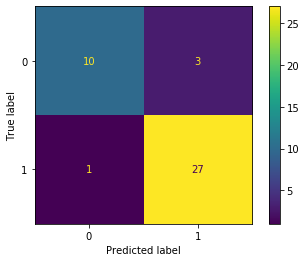

In [28]:
#Confusion matrix
conf_matrix = confusion_matrix(test_y, prediction)
print(conf_matrix)
plot_confusion_matrix(logistic, test_x, test_y)

<font color=blue>#10 samples has been correctly predicted as Service done. 3 samples of car which has not done the Service has been incorrectly predicted as Service done. 27 samples are correctly predicted in the other class which haven't done the Service. 1 sample is incorrectly predicted as 'Service not done' which actually has done the Service'.The total number of misclassified samples are 4</font> 

In [29]:
#Accuracy Score
acc_score=accuracy_score(test_y, prediction)
print(acc_score)

0.9024390243902439


In [30]:
print('Misclassified samples: %d' % (test_y!=prediction).sum())

Misclassified samples: 4


In [31]:
report = classification_report(test_y, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.90      0.96      0.93        28

    accuracy                           0.90        41
   macro avg       0.90      0.87      0.88        41
weighted avg       0.90      0.90      0.90        41



# Observations:
Accuracy after doing Logistic Regression is 90 % . Precision for the cars which have done Service is 91 % (Out of the predicted class 'Service done' 91% is predicted correctly)and which havent done the Service is 90% (Out of the predicted Class 'Service not Done' 90% of the values are predicted correctly). Recall for the cars which have done the Service is 77%(Out of all the cars which have done the Service only 77% of the samples have been predicted correctly) and which have not done Service is 96% (Out of all the cars which have not done service 96% predictions are correct).
There are four observations classified incorrectly. One of them is a false negative, while the other 3 are false positive.

# KNN Classifier: without standardising

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5]


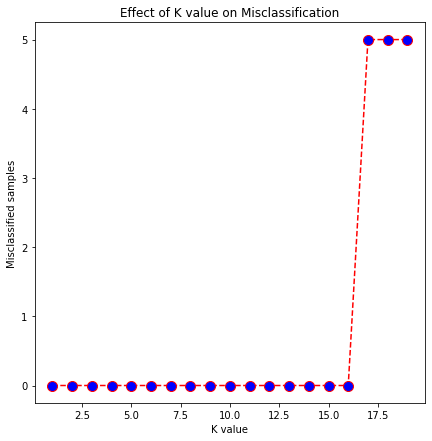

0.9024390243902439


In [32]:
from sklearn.neighbors import KNeighborsClassifier

Misclassified_sample = []
# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i=knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
    
    
print(Misclassified_sample)

#Plotting the effect of K
plt.figure(figsize = (7,7))
plt.plot(range(1,20,1),Misclassified_sample,
         color='red',linestyle='dashed' , marker='o',
         markerfacecolor='blue' , markersize=10)

plt.title('Effect of K value on Misclassification')
plt.xlabel('K value')
plt.ylabel('Misclassified samples')
plt.show()

acc_score=accuracy_score(test_y, prediction)
print(acc_score)

# Observations:
Accuracy by doing KNN Classifier is 100 percent for values of k from 1 to 16.

<b>KNN performs better than the Logistic Regression for this dataset.

# CrossValidation for Logistic Regression

In [33]:
def evaluate(yt,yp):
    cf=confusion_matrix(yt,yp)
    acc=accuracy_score(yt,yp)
    return cf,acc
# Display metrics
def display(yt,yp,model):
    cf,acc = evaluate(yt,yp)
    print('Model=',model,'\ncf=',cf,'\nacc=',acc,'\n')

In [34]:
logistic = LogisticRegression() # Creating a logistic instance
logistic.fit(train_x,train_y) # Fit logistic model over train sets
n_folds=5 # Use 5 folds for cross validation
scores= cross_val_score(logistic,train_x,train_y,cv=n_folds,scoring='accuracy') # Function to estimate the scores for each fold
scores_cv = cross_validate(logistic,train_x,train_y,cv=n_folds,scoring='accuracy',return_estimator=True,return_train_score=True) # Function to store the models built for each fold
y_cv_pred_logistic=cross_val_predict(logistic,train_x,train_y,cv=n_folds) # Predicts the class for test samples using the estimator obtained with best cv score 


In [35]:
scores

array([0.94736842, 0.94736842, 0.89473684, 0.94736842, 0.94444444])

In [36]:
# scores
scores_cv['estimator'][1].predict(test_x)
# predict and display evaluation metrics for test dataset
y_test_pred_logistic=logistic.predict(test_x)

In [37]:
display(train_y,y_cv_pred_logistic,'Logistic: Validation')

Model= Logistic: Validation 
cf= [[19  4]
 [ 2 69]] 
acc= 0.9361702127659575 



In [38]:
display(test_y,y_test_pred_logistic,'Logistic: Testing')

Model= Logistic: Testing 
cf= [[10  3]
 [ 1 27]] 
acc= 0.9024390243902439 



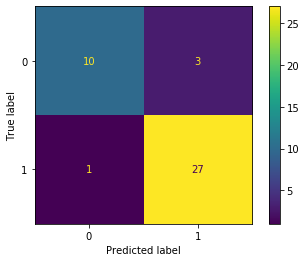

In [39]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic, test_x, test_y)

#Accuracy after cross validation is the same which is 90%

# Logisitc Regression After standardising and splitting the data

In [40]:
features=list(set(service_data.columns)-set(['Service']))

y=service_data['Service'].values
print(features)

x=service_data[features].values

['NormMileage', 'HVACwear', 'OilQual', 'TyreWear', 'EnginePerf']


In [41]:
#Standardising instance
sc=StandardScaler()

In [42]:
#Splitting the data into train and test data
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [44]:
#Making the instance of the  model
logistic=LogisticRegression(max_iter=1000,solver='lbfgs')

In [45]:
logistic.fit(train_x,train_y)
logistic.coef_

array([[ 0.36767608, -1.04438104,  0.11772987,  0.76227982,  0.03380229]])

In [46]:
logistic.intercept_

array([1.14285947])

In [47]:
prediction=logistic.predict(test_x)
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


[[ 0 13]
 [ 0 28]]


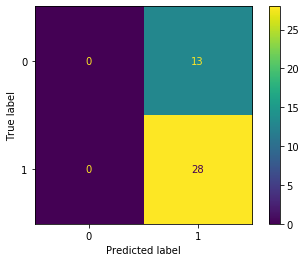

In [48]:
conf_matrix = confusion_matrix(test_y, prediction)
print(conf_matrix)
plot_confusion_matrix(logistic, test_x, test_y)

In [49]:
acc_score=accuracy_score(test_y, prediction)
print(acc_score)

0.6829268292682927


In [50]:
print('Misclassified samples: %d' % (test_y!=prediction).sum())

Misclassified samples: 13


In [51]:
report = classification_report(test_y, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.68      1.00      0.81        28

    accuracy                           0.68        41
   macro avg       0.34      0.50      0.41        41
weighted avg       0.47      0.68      0.55        41



c:\users\sreepa\desktop\pyspark\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sreepa\desktop\pyspark\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\sreepa\desktop\pyspark\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observations:
    #After standardising the data the accuracy has decreased to 68% . All the cars which has done the Service has been incorrectly predicted. The dataset 'ServiceTest.csv' is highly biased.That might be the reason for getting lower accuracy for Logistic Regression after standardising the dataset.

# KNN Classifier after Standardising the dataset

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5]


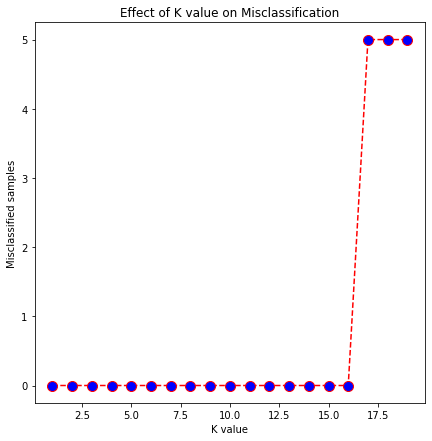

In [52]:
from sklearn.neighbors import KNeighborsClassifier

Misclassified_sample = []
# Calculating error for K values between 1 and 40
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i=knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())
    
print(Misclassified_sample)

#Plotting the effect of K
plt.figure(figsize = (7,7))
plt.plot(range(1,20,1),Misclassified_sample,
         color='red',linestyle='dashed' , marker='o',
         markerfacecolor='blue' , markersize=10)

plt.title('Effect of K value on Misclassification')
plt.xlabel('K value')
plt.ylabel('Misclassified samples')
plt.show()

#<b> Observations:<b><br>
Accuracy is 100 percent when the value of k is between 1 and 16. For greater k values there are few misclassified samples.

<b>KNN performs better than Logisitc Regression for this dataset.<b>


# Logistic Regression after Removing the features 'EnginePerf','TyreWear','OilQual'

In [53]:
features=list(set(service_data.columns)-set(['Service','EnginePerf','TyreWear','OilQual']))

#features=list(['OilQual'])
y=service_data['Service'].values
print(features)

x=service_data[features].values

['NormMileage', 'HVACwear']


In [54]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=0)
#Making the instance of the  model
logistic=LogisticRegression(max_iter=1000)
#Fitting the values for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_
#Prediction from test data
prediction=logistic.predict(test_x)
print(prediction)
#Confusion matrix
conf_matrix = confusion_matrix(test_y, prediction)
print(conf_matrix)
acc_score=accuracy_score(test_y, prediction)
print(acc_score)
print('Misclassified samples: %d' % (test_y!=prediction).sum())

report = classification_report(test_y, prediction)
print(report)

[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1]
[[10  3]
 [ 1 27]]
0.9024390243902439
Misclassified samples: 4
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.90      0.96      0.93        28

    accuracy                           0.90        41
   macro avg       0.90      0.87      0.88        41
weighted avg       0.90      0.90      0.90        41



<font color = green># Tried removing the variables are there is multicolinearity between the predictor variables. After removing the variables 'EnginePerf','TyreWear','OilQual' , Logistic Regression gives the same accuracy with all the variables ie 90%. If we remove the variables 'HVACWear' or 'NormMileage' the accuracy decreases. 

#<b>Inferences
<br>
After doing all these methods the accuracy for Logistic Regression didn't improve from 90% and KNN gives 100 % accuracy for smaller k values.Hence we can say that KNN gives the better accuracy for the dataset 'ServiceTest.csv'.<br>That means We can use KNN ( with k values 0 to 15) for this dataset for better prediction .